# Chapter 2 練習と総合問題解答

In [3]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

#### <練習問題 2-1>

1から50までの自然数の和を計算するプログラムを書いて、最後の計算結果を表示させるプログラムを書いてください。ただし、np.arrayで1から50までの配列を作り、その総和を求める方法で計算してください。

In [ ]:
# 解答
numpy_sample_data = np.array([i for i in range(1,51)])
print(numpy_sample_data.sum())

#### <練習問題 2-2>

標準正規分布に従う乱数を10個発生させて配列を作成してください。また、その中での最小値、最大値、合計を求めるプログラムを書いてください。

In [ ]:
# 解答 
# seedを設定することで乱数を固定化することができる
random.seed(0)

# 標準正規分布（平均0、分散1の正規分布）の乱数を10個発生
norm_random_sample_data = random.randn(10)

print("最小値：",norm_random_sample_data.min())
print("最大値：",norm_random_sample_data.max())
print("合計：",norm_random_sample_data.sum())

#### <練習問題 2-3>

要素がすべて3の5行5列の行列を作成し、その行列の2乗をする計算をしてみましょう。

In [ ]:
# 解答 
m =  np.ones((5,5),dtype='i') * 3
print(m.dot(m))

#### <練習問題 2-4>

以下の行列について、行列式を求めてください。

$
  A = \left(
    \begin{array}{ccc}
      1 & 2 & 3 \\
      1 & 3 & 2 \\
      3 & 1 & 2
    \end{array}
  \right)
$

In [ ]:
# 解答
a = np.array([[1,2,3],[1,3,2],[3,1,2]])
print(np.linalg.det(a))

#### <練習問題 2-5>

<練習問題 2-4>と同じ行列について、逆行列、固有値と固有ベクトルを求めてください。

In [ ]:
# 解答
import scipy.linalg as linalg

a = np.array([[1,2,3],[1,3,2],[3,1,2]])

# 逆行列
print("逆行列")
print(linalg.inv(a))

# 固有値と固有ベクトル
eig_value, eig_vector = linalg.eig(a)

print("固有値")
print(eig_value)
print("固有ベクトル")
print(eig_vector)

#### <練習問題 2-6>

以下の関数が0となる解を、ニュートン法を用いて求めてみましょう。

\begin{eqnarray}
f(x) = x^3 + 2x+ 1
\end{eqnarray}

In [ ]:
# 解答
from scipy.optimize import newton

# 関数の定義
def sample_function1(x):
    return (x**3 + 2*x + 1)

# 計算実行
print(newton(sample_function1,0))

# 確認
print(sample_function1(newton(sample_function1,0)))

#### <練習問題 2-7>

以下のデータに対して、`Money`が500以上の人を絞り込んで、レコードを表示してください。

In [ ]:
attri_data1 = {
        'ID':['1','2','3','4','5']
        ,'Sex':['F','F','M','M','F']
        ,'Money':[1000,2000,500,300,700]
        ,'Name':['Saito','Horie','Kondo','Kawada','Matsubara']
}

attri_data_frame1 = DataFrame(attri_data1)

In [ ]:
# 解答
attri_data_frame1[attri_data_frame1.Money>=500]

#### <練習問題 2-8>

<練習問題 2-7>のデータに対して、男女別（`MF`別）の平均`Money`を求めてください。

In [ ]:
# 解答
attri_data_frame1.groupby("Sex")["Money"].mean()

#### <練習問題 2-9>

<練習問題 2-7>のデータに対して、以下のデータの同じ`ID`をキーとして、データをマージしてください。そしてそのマージ後のデータに対して、`Money`と`Math`と`English`の平均を求めてください。

In [ ]:
attri_data2 = {
        'ID':['3','4','7']
        ,'Math':[60,30,40]
        ,'English':[80,20,30]
}

attri_data_frame2 = DataFrame(attri_data2)

In [ ]:
# 解答
merge_data = attri_data_frame1.merge(attri_data_frame2)
merge_data.mean()

#### <練習問題 2-10>

$y = 5x + 3$ （$x$は$-10$から$10$の値）のグラフを描いてみましょう。

In [ ]:
x = np.linspace(-10, 10,100)
plt.plot(x, 5*x + 3)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.grid(True)

#### <練習問題 2-11>

「$y = sin(x)$」と「$y = cos(x)$」のグラフを重ねて描いてください（$x$は-10から10の値）

In [ ]:
# 解答
x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x)) 
plt.plot(x, np.cos(x)) 

plt.grid(True)

#### <練習問題 2-12>

0から1の値をとる一様乱数を1,000個、2組発生させて、それぞれのヒストグラムを描いてみましょう。

なお、それぞれのヒストグラムを別のグラフに表示するために、`plt.subplot`を利用してください。また、ここで一様乱数とは、ある数から別のある数まで等確率で発生する乱数のことをいい、`np.random.uniform`を使います。たとえば、0から1までの数を10個発生させる場合は、`np.random.uniform(0.0, 1.0, 10)`とします。

また、1,000個だけではなく、100個や10,000個などでも実施してみましょう。何かわかることはありますか。

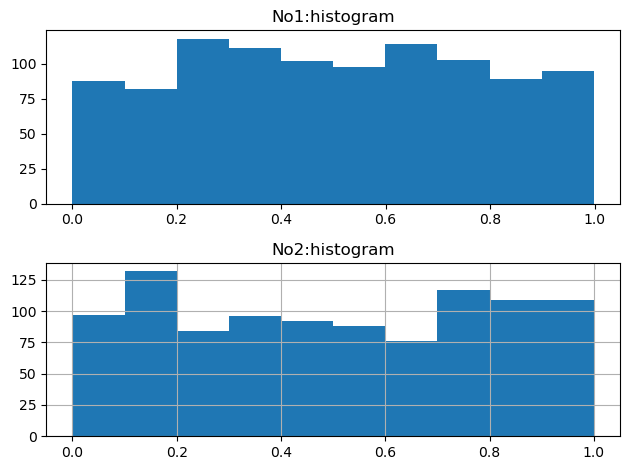

In [5]:
# 解答
import math

# 解答 
def uni_hist(N):
    # 一様乱数の発生
    x = np.random.uniform(0.0, 1.0, N)
    y = np.random.uniform(0.0, 1.0, N)

    plt.subplot(2, 1, 1)
    plt.hist(x)
    plt.title("No1:histogram")

    plt.subplot(2, 1, 2)
    plt.hist(y)
    plt.title("No2:histogram")

    plt.grid(True)

    #タイトルの被りを防ぐ
    plt.tight_layout()

uni_hist(1000)

#### 100個の一様乱数を2組発生させる場合のプログラム

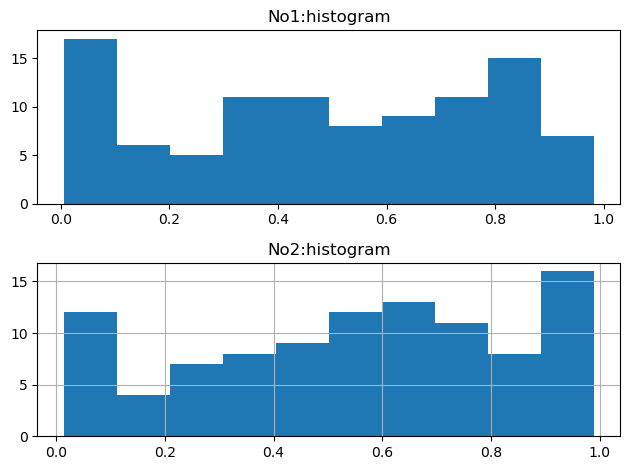

In [7]:
# N=100
uni_hist(100)

#### 10,000個の一様乱数を2組発生させる場合のプログラム

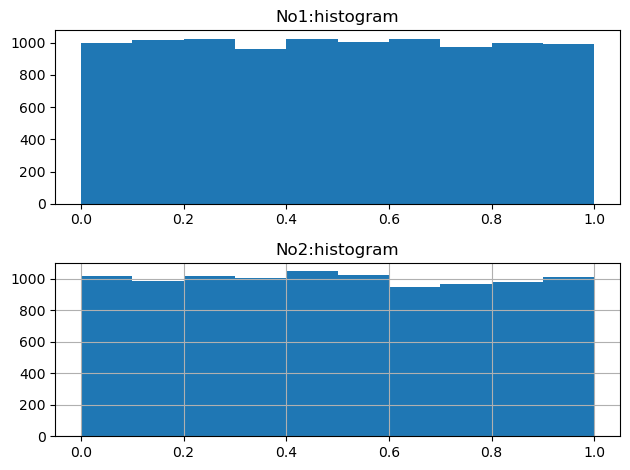

In [9]:
# N = 10000
uni_hist(10000)

なお、2組の一様乱数は、Nが大きくなるにつれ、棒グラフにばらつきがなくなり、一定になっているのがわかります。

## 2.2 総合問題

### ■総合問題2-1　モンテカルロ法

乱数を発生させる方法を使って、円周率を求めるプログラムを作成してみましょう。なお、このアプローチを**モンテカルロ法**といいます。

（1）区間`[0,1]`上の一様分布に従う乱数を2組発生させて、それぞれ10,000個の一様乱数を作ってみましょう。なお、一様乱数とは、ある数から数まで等確率で発生する乱数のことをいい、`np.random.uniform`を使います。使い方としては、0から1までの数を10個発生させる場合は、`np.random.uniform(0.0, 1.0, 10)`とします。

In [19]:
# 解答
import math

# 解答 (1)
N = 10000

# 一様乱数の発生
x = np.random.uniform(0.0, 1.0, N)
y = np.random.uniform(0.0, 1.0, N)
x

array([0.414, 0.678, 0.048, ..., 0.728, 0.928, 0.256])

（2）$x−y$軸を使った中心$(0,0)$、半径1の円と、長さ1の正方形を考えたとき、円の面積は$\pi$となり、正方形の面積は1となります。先ほど（1）で作った、$x$と$y$の組み合わせの乱数10,000個のうち、この円の内部に入る点は何組あるでしょうか。

ここで、円の内部に入るとは、$x−y$座標の原点から点$ (x, y) $のベクトルの長さを求め、それが1より小さくなる場合を判定基準とします。なお、その長さを求めるために、ユークリッドノルム($\sqrt{x^2 + y^2}$)を使い、 `math.hypot(x,y)`で計算できます。さらに、余裕があれば、円の中に入った$x$と$y$の組み合わせと外に出た$x$と$y$の組み合わせをプロットして図にしてみましょう。

In [21]:
# 円の中に入ったxとy
inside_x = []
inside_y = []

# 円の外に出たxとy
outside_x = []
outside_y = []

count_inside = 0
for count in range(0, N):
    d = math.hypot(x[count],y[count])
    if d < 1:
        count_inside += 1
        # 円の内部に入った時のxとyの組み合わせ
        # appendはリストに要素を追加するメソッド
        inside_x.append(x[count])
        inside_y.append(y[count])
    else:
        # 円の外に出た時のxとyの組み合わせ
        outside_x.append(x[count])
        outside_y.append(y[count])
    
print("円の内部に入った数:",count_inside)

円の内部に入った数: 7957


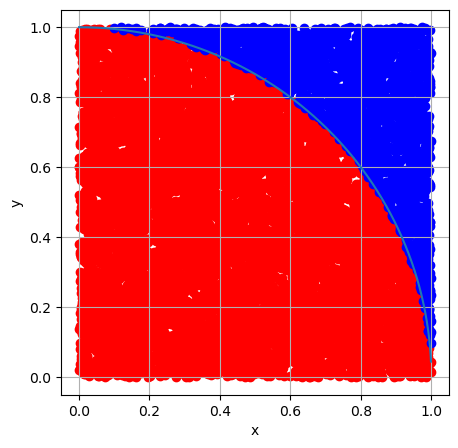

In [23]:
# さらに図にする
# 図のサイズ
plt.figure(figsize=(5,5))

# 円を描くためのデータ
circle_x = np.arange(0,1,0.001)
circle_y = np.sqrt(1- circle_x * circle_x)

# 円を描く
plt.plot(circle_x, circle_y) 

# 円の中に入っているのが、red
plt.scatter(inside_x,inside_y,color="r")
# 円の外に出たのが、blue
plt.scatter(outside_x,outside_y,color="b")

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

（3）半径1の1/4の円の面積と長さ1の正方形の面積の比は、$ \pi /4 : 1$となります。これと（2）の結果を利用して、円周率を求めてみましょう。

In [25]:
# 解答 (3)
print ("円周率の近似値:",4.0 * count_inside / N)

円周率の近似値: 3.1828
